In [147]:
!python evo_simulator.py -i input_EvoSimulation.csv -t 0 3 6 9 12 -r 50 50 50 50 50 -o output

In [151]:
!python fitseq.py -i output_EvoSimulation_Read_Number.csv -t 0 3 6 9 12 -o output

Iteration 1: -30381.511081694654
Iteration 2: -30143.201343204935
Iteration 3: -30151.346848132467


In [152]:
import numpy as np
import pandas as pd

x_true = np.array(pd.read_csv('output_EvoSimulation_Input_Log.csv')['Fitness'], dtype=float)
x_estimate = np.array(pd.read_csv('output_FitSeq.csv')['Estimated_Fitness'], dtype=float)

(-0.5, 0.5)

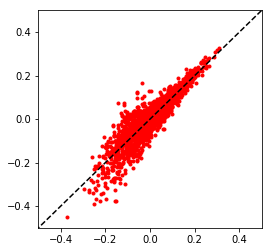

In [153]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4))
plt.plot(x_true, x_estimate, '.', color='r')
plt.plot([-1,1], [-1,1], '--', color='k')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

In [127]:
!python fitseq.py -i Simulated_Pooled_Growth_Reads_10000Genotypes.csv -t 0 8 16 24 -o python_version

Iteration 1: -89192.4023611108
Iteration 2: -89180.33410710108
Iteration 3: -89190.73822838746


In [131]:
import numpy as np
import pandas as pd

x_true = np.array(pd.read_csv('./fitseq_history/FitSeq_MATLAB/Simulated-Pooled-Growth_Fitness_10000Genotypes.csv', header=None)[0], dtype=float)
x_estimate_python = np.array(pd.read_csv('python_version2_FitSeq.csv')['Estimated_Fitness'], dtype=float)
x_estimate_matlab = np.array(pd.read_csv('./fitseq_history/FitSeq_MATLAB/Test_Fit-Seq_result_20191105-104905381_EstimatedFitness.csv', header=None), dtype=float)


(-1, 0.8)

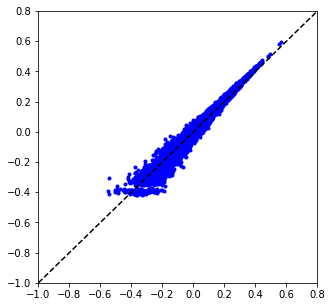

In [132]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
plt.plot(x_true, x_estimate_python, '.', color='b')
#plt.plot(x_true, x_estimate_matlab, '.', color='r')
plt.plot([-1,1], [-1,1], '--', color='k')

plt.xlim(-1, 0.8)
plt.ylim(-1, 0.8)

In [ ]:
import matplotlib.pyplot as plt

counts, bins = np.histogram(fitness_est, bins=np.arange(-1,1,0.02), density=None)
plt.bar((bins[0:-1] + bins[1:])/2, counts, width=0.02)

In [ ]:
x_estimate = np.array(pd.read_csv('output_FitSeq.csv')['Estimated_Fitness'], dtype=float)

In [188]:
A = np.array(pd.read_csv('output_FitSeq.csv')['Estimated_Read_Number'])


AttributeError: 'numpy.ndarray' object has no attribute '_constructor_expanddim'

In [190]:
A = pd.read_csv('output_FitSeq.csv')['Estimated_Read_Number']
B = pd.Series.to_frame(A)
np.array(B)

array([['[ 44  59 116  95 123]'],
       ['[ 38  53 144 168 230]'],
       ['[44 23 11  8  5]'],
       ...,
       ['[ 46  56  70 109  97]'],
       ['[40 32 38 23  9]'],
       ['[ 43  48  52  95 111]']], dtype=object)

In [202]:
A[0]

'[ 44  59 116  95 123]'

In [205]:
A = pd.read_csv('output_FitSeq.csv')['Estimated_Read_Number']
B = pd.Series(A).str.replace('[ ', '', regex=False)
B

0       44  59 116  95 123]
1       38  53 144 168 230]
2          [44 23 11  8  5]
3       49  55  60 105  81]
4          [63 32 12 12  7]
5          [48 34 26 16  8]
6          [49 26 16  8  2]
7          [53 44 45 47 33]
8          [46 48 33 55 53]
9       71  91 121 107 149]
10         [58 44 38 24 28]
11         [53 39 33 23 18]
12         [36 41 71 60 55]
13         [46 49 80 53 38]
14         [58 67 88 76 93]
15         [52 46 41 25 32]
16         [48 49 66 68 57]
17         [44 26 14  9  3]
18         [50 39 39 27 25]
19         [55 46 48 46 31]
20         [65 51 37 19  7]
21         [59 56 57 56 37]
22         [48 41 33 35 28]
23         [72 42 24 16 12]
24         [44 38 39 33 29]
25         [39 38 58 54 45]
26         [48 57 96 91 78]
27         [34 30 33 22 13]
28         [55 59 74 58 92]
29         [40 32 35 32 16]
               ...         
1970       [47 28 19 19  8]
1971       [47 23 15 11  8]
1972       [46 38 57 32 27]
1973       [51 35 22  7  4]
1974       [57 58 67

In [216]:
len(F)

2000

In [223]:
import itertools
list(itertools.zip_longest(*list(tempt.values())))

TypeError: 'numpy.ndarray' object is not callable

In [228]:
tempt.values()

TypeError: 'numpy.ndarray' object is not callable

In [250]:
F[0][:].split()

["'44','59','116','95','123'"]

In [245]:
A = pd.read_csv('output_FitSeq.csv')['Estimated_Read_Number']
B = pd.Series(A).str.replace('[ ', '[', regex=False)
C = pd.Series(B).str.replace('[', "'", regex=False)
D = pd.Series(C).str.replace(']', "'", regex=False)
E = pd.Series(D).str.replace('  ', ' ', regex=False)
F = pd.Series(E).str.replace(' ', "','", regex=False)

tempt = pd.DataFrame(F)
tempt.to_csv('test.csv', index=False, header=False)



In [246]:
F

0        '44','59','116','95','123'
1       '38','53','144','168','230'
2            '44','23','11','8','5'
3         '49','55','60','105','81'
4           '63','32','12','12','7'
5           '48','34','26','16','8'
6            '49','26','16','8','2'
7          '53','44','45','47','33'
8          '46','48','33','55','53'
9       '71','91','121','107','149'
10         '58','44','38','24','28'
11         '53','39','33','23','18'
12         '36','41','71','60','55'
13         '46','49','80','53','38'
14         '58','67','88','76','93'
15         '52','46','41','25','32'
16         '48','49','66','68','57'
17           '44','26','14','9','3'
18         '50','39','39','27','25'
19         '55','46','48','46','31'
20          '65','51','37','19','7'
21         '59','56','57','56','37'
22         '48','41','33','35','28'
23         '72','42','24','16','12'
24         '44','38','39','33','29'
25         '39','38','58','54','45'
26         '48','57','96','91','78'
27         '34','30','33','2

In [267]:
import csv

A = pd.read_csv('output_FitSeq.csv')['Estimated_Read_Number']
B = pd.Series(A).str.replace('[ ', '[', regex=False)
C = pd.Series(B).str.replace('[', '', regex=False)
D = pd.Series(C).str.replace(']', '', regex=False)
E = pd.Series(D).str.replace('  ', ' ', regex=False)
#F = pd.Series(E).str.replace(' ', ',', regex=False)

#tempt = pd.DataFrame(F)
#tempt.to_csv('test.csv', index=False, header=False)

with open('test.csv', mode='w') as f:
    w = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(F)):
        w.writerow(E[i].split())


In [271]:
import csv

A = pd.read_csv('output_FitSeq.csv')['Estimated_Read_Number']
B = pd.Series(A).str.replace('[', '', regex=False)
C = pd.Series(B).str.replace(']', '', regex=False)

with open('test.csv', mode='w') as f:
    w = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(C)):
        w.writerow(C[i].split())
        
read_num_seq = np.array(pd.read_csv('test.csv', header=None), dtype=int)

In [275]:
i = 1
'Estimated_Read_Number_t%d' % i

'Estimated_Read_Number_t1'

In [293]:
tempt = pd.read_csv('output_FitSeq.csv')
read_num_seq = np.array(tempt[tempt.columns[3:]], dtype=int)
read_num_seq

array([[ 44,  59, 116,  95, 123],
       [ 38,  53, 144, 168, 230],
       [ 44,  23,  11,   8,   5],
       ...,
       [ 46,  56,  70, 109,  97],
       [ 40,  32,  38,  23,   9],
       [ 43,  48,  52,  95, 111]])

In [299]:
read_num_seq = np.array(pd.read_csv('output_FitSeq.csv', header=None), dtype=int)
read_num_seq.shape

ValueError: invalid literal for int() with base 10: 'Estimated_Fitness'

In [307]:
read_num_seq = np.array(pd.read_csv('output_FitSeq.csv').iloc[:,3:], dtype=int)
read_num_seq

array([[ 44,  59, 116,  95, 123],
       [ 38,  53, 144, 168, 230],
       [ 44,  23,  11,   8,   5],
       ...,
       [ 46,  56,  70, 109,  97],
       [ 40,  32,  38,  23,   9],
       [ 43,  48,  52,  95, 111]])